<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

**Grupo 21**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import scipy as sc

seaborn.set_context('talk')
seaborn.set_theme(style = 'white')

## Lectura y curación del dataset

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,id,cured_programming_languages,work_role_bis
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN,0,[],Consultant
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN,1,"[html, javascript, python]",Developer
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN,2,[],Infosec


Cantidad de observaciones

In [ ]:
len(df)

6095

Nombres de las columnas

In [ ]:
print("Columnas del DF:", df.columns.values)

Columnas del DF: ['profile_gender' 'profile_age' 'work_country' 'work_province'
 'profile_years_experience' 'work_years_in_company'
 'work_years_in_current_position' 'work_people_in_charge_of'
 'profile_studies_level' 'profile_studies_level_state' 'profile_career'
 'profile_university' 'profile_specialization_courses'
 'profile_open_source_contributions' 'profile_programming_as_hobby'
 'work_role' 'tools_platform' 'tools_programming_languages'
 'tools_frameworks' 'tools_data_bases' 'tools_qa_testing' 'tools_IDEs'
 'tools_work_pc_os' 'tools_cellphone_os' 'work_on_call_duty'
 'salary_on_call_duty_charge' 'work_on_call_duty_charge_type'
 'work_contract_type' 'salary_monthly_BRUTO' 'salary_monthly_NETO'
 'salary_in_usd' 'salary_satisfaction' 'salary_comparison_last_semester'
 'salary_has_bonus' 'salary_bonus_tied_to'
 'salary_inflation_adjustment_2020'
 'salary_percentage_inflation_adjustment_2020'
 'salary_month_last_inflation_adjustment' 'work_has_violence_situations'
 'profile_sexual_or

In [ ]:
print("Tipos de datos del DF:")
print(df.dtypes)

Tipos de datos del DF:
profile_gender                                   object
profile_age                                       int64
work_country                                     object
work_province                                    object
profile_years_experience                        float64
work_years_in_company                           float64
work_years_in_current_position                  float64
work_people_in_charge_of                          int64
profile_studies_level                            object
profile_studies_level_state                      object
profile_career                                   object
profile_university                               object
profile_specialization_courses                   object
profile_open_source_contributions                object
profile_programming_as_hobby                     object
work_role                                        object
tools_platform                                   object
tools_programming_languag

In [ ]:
df['profile_age'].describe()

count     6095.000000
mean        41.181952
std        665.721175
min         18.000000
25%         27.000000
50%         31.000000
75%         37.000000
max      52000.000000
Name: profile_age, dtype: float64

Limipiamos las edades fuera del rango de 18 a 75 años, ya que 18 es el minimo inicialmente

In [ ]:
df = df[df.profile_age<=75]

Limipiamos años de experiencia fuera del rango de 0 a 60 años

In [ ]:
df['profile_years_experience'].describe()

count    6093.000000
mean        8.929033
std         7.160865
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max       115.000000
Name: profile_years_experience, dtype: float64

In [ ]:
df = df[df.profile_years_experience<60]
len(df)

6092

Creamos identificador de fila para mantener seguimiento de los datos


In [ ]:
df['id'] = np.arange(len(df)) 

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

## **1.** Selección de columnas relevantes



*   **tools_programming_languages**: Indica los lenguages de programacion de cada programador
*   **salary_monthly_NETO**: Salario neto de cada programador

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO','id']#'salary_satisfaction'

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '').replace('ninguno','')\
    #.replace('-','').replace('.','').replace('lenguaje','').replace('|','')\
    #.replace('lenguajes','').replace('Ninguno','').replace('ninguna','')\
    #.replace('No','').replace('no aplica','').replace('No aplica (Mule)','')\
    #.replace('No programo','').replace('Ninguno de los anteriores','')\
    #.replace('no programo soy recruiter','').replace('es un lenguaje','')\
    #.replace('Nada','').replace('usar','').replace('puedo','').replace('ni','')\
    #.replace('aprendo','').replace('donde','').replace('pedorro','').replace('laburo','')\
    #.replace('lenguaje!!!!','')
    
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]



,programming_language,tools_programming_languages,salary_monthly_NETO,id,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,1,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,1,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,1,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,3,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,3,"[bash/shell, c, css, html, java, javascript, p..."


## **2.** Selección de filas relevantes a analizar

In [ ]:
df['salary_monthly_NETO'].describe().round(2)

count       5880.00
mean       94909.60
std        96884.64
min            1.00
25%        51433.25
50%        77900.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: float64

En relacion a la muestra, buscamos los lenguajes de programacion que tengan salario Neto mas altos para acortar los campos.  Eleguimos este salario ya que es lo que el empleado percibe propiamente en bolsillo como su remuneracion.

Tomaremos los salario mayores a 100000 ya que estan por encima de la media y estan practicamente luego del percentil 75% de la muestra.

**Subpoblación**: Salarios > 100000



### *Obtenemos la subpoblacion de salarios mayores a 100000 y su probabilidad*

In [ ]:
lon_incial = len(df_lang)
print("Longitud inicial: ", lon_incial)
df_max_salaries = df_lang[df_lang.salary_monthly_NETO > 100000]
lon_max_salaries = len(df_max_salaries)
print("Longitud de los salario mayores a 100000: ", lon_max_salaries)
P_A = round(lon_max_salaries/lon_incial,2)
print("P(A): ", P_A*100, "%")
df_max_salaries = df_max_salaries.sort_values('salary_monthly_NETO',ascending=False)
df_max_salaries[:5]

Longitud inicial:  17662
Longitud de los salario mayores a 100000:  5323
P(A):  30.0 %


,programming_language,tools_programming_languages,salary_monthly_NETO,id,cured_programming_languages
4486,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,4484,"[bash/shell, c, css, html, java, javascript, r..."
4486,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,4484,"[bash/shell, c, css, html, java, javascript, r..."
4486,typescript,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,4484,"[bash/shell, c, css, html, java, javascript, r..."
4486,sql,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,4484,"[bash/shell, c, css, html, java, javascript, r..."
4486,ruby,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,4484,"[bash/shell, c, css, html, java, javascript, r..."


**A** = salary_monthly_NETO > 100000

$P(A):$ Probabilidad de tener un salario mayor a 100000

$$P(A) = 30\%$$

### *Obtenemos la subpoblacion de lenguajes mas populares y su probabilidad*

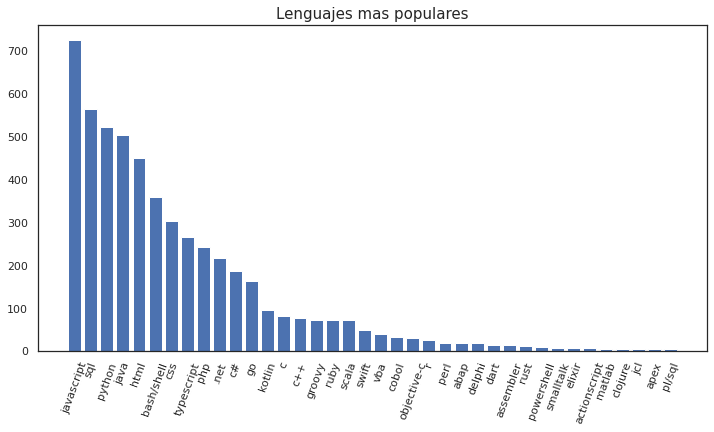

In [ ]:
language_count = df_max_salaries.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

df_pop_lang = language_count[language_count.frequency > language_count.frequency.median()].set_index('language',drop=True)#usar mediana en lugar de media
#sns.barplot(df_pop_lang)

x_values = df_pop_lang.index
y_values = df_pop_lang.frequency.tolist()

plt.figure(figsize=(12,6))
plt.tick_params(axis='x',labelrotation=70)
plt.rcParams['axes.titlesize'] = 15
plt.bar(x_values, y_values)          
plt.title('Lenguajes mas populares');

Observando el grafico seleccionamos los 12 lenguajes mas populares, cuyos salarios son mayor a 100000.

In [ ]:
language_count = df_max_salaries.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count = language_count.sort_values('frequency',ascending=False)
most_popular_lenguages = list(language_count.language[:12])#convertirmos los mas populares en una lista
print(f"Los 12 lenguajes mas populares son: {most_popular_lenguages}, serán estos asociados a los mejores salarios?")
language_count[:12]

Los 12 lenguajes mas populares son: ['javascript', 'sql', 'python', 'java', 'html', 'bash/shell', 'css', 'typescript', 'php', '.net', 'c#', 'go'], serán estos asociados a los mejores salarios?


,language,frequency
0,javascript,725
1,sql,564
2,python,521
3,java,504
4,html,449
5,bash/shell,358
6,css,303
7,typescript,265
8,php,243
9,.net,217


In [ ]:
df_most_pop_lenguals_total = df_lang[df_lang['programming_language'].isin(most_popular_lenguages)]
print(f"Longitud de lenguages mas populares del total : {len(df_most_pop_lenguals_total)}")
P_B = round(len(df_most_pop_lenguals_total)/lon_incial,2)
print(f"Prob. de conocer al menos un lenguaje de los 12 mas populares : {P_B*100}%")

Longitud de lenguages mas populares del total : 15219
Prob. de conocer al menos un lenguaje de los 12 mas populares : 86.0%


**B** = programming_language in most_popular_lenguages

$P(B):$ Probabilidad de conocer al menos un lenguaje de programacion dentro de los 12 mas populares

$$P(B) = 86\%$$

Creamos nuevo data frame con los 12 lenguajes populares

In [ ]:
df_max_salaries_12populars = df_max_salaries[df_max_salaries['programming_language'].isin(most_popular_lenguages)]
df_max_salaries_12populars[:10]
P_A_I_B = round(len(df_max_salaries_12populars)/lon_incial,2) #lon_max_salaries
print("Longitud de la poblacion con los 12 lenguajes mas populares con salarios mayores a 100000: ", len(df_max_salaries_12populars))
print("Proporcion de lenguajes mas populares con respecto al total que tienen mayor salario: ", P_A_I_B*100,"%")

Longitud de la poblacion con los 12 lenguajes mas populares con salarios mayores a 100000:  4498
Proporcion de lenguajes mas populares con respecto al total que tienen mayor salario:  25.0 %


**A** = salary_monthly_NETO > 100000

**B** = programming_language in most_popular_lenguages

$A \cap B$ = 4498 

$P(A \cap B):$ Probabilidad de cobrar mas de 100000 y de conocer al menos un lenguaje de programacion dentro de los 12 mas populares

$$P(A \cap B)= 25\%$$


En un boxplot presentaremos los datos para observar o no la existencia de outliers

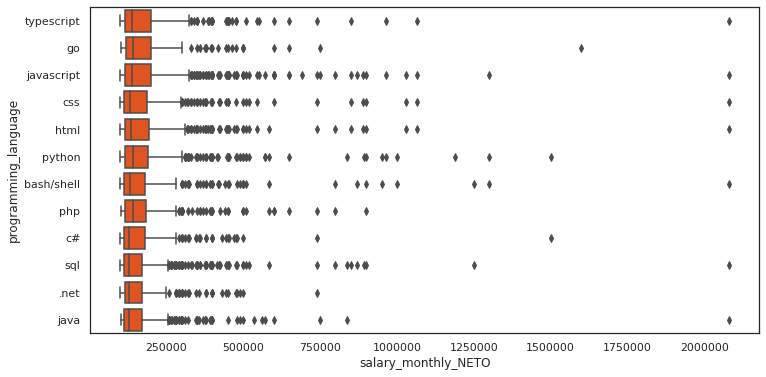

In [ ]:
my_order = df_max_salaries_12populars.groupby(by=["programming_language"])["salary_monthly_NETO"].mean().sort_values(ascending=True).iloc[::-1].index
#df_max_100_salaries = df_max_salaries.nlargest(2000, ['salary_monthly_NETO']) 
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_max_salaries_12populars, x='salary_monthly_NETO', y='programming_language',
                color='orangered', order = my_order)
plt.ticklabel_format(style='plain', axis='x')

Observamos que existen outliers en los datos, por lo que procederemos a hacer una limpieza de estos y realizar los mismos analisis

###Analizaremos las probabilidades sin OUTLIERS

Eliminaremos los outliers: Percentiles 0.05 y 0.99 de la base ORIGINAL




In [ ]:
##CREAMOS DF_WOO
#eliminamos los outliers de la poblacion inicial
min_thresold_df_n, max_thresold_df_n = df.salary_monthly_NETO.quantile([0.05,0.99])
min_thresold_df_b, max_thresold_df_b = df.salary_monthly_BRUTO.quantile([0.05,0.99])
df_woo = df[(df.salary_monthly_NETO<max_thresold_df_n)&(df.salary_monthly_NETO>min_thresold_df_n)\
            &(df.salary_monthly_BRUTO<max_thresold_df_b)&(df.salary_monthly_BRUTO>min_thresold_df_b)]
lon_df_woo = len(df_woo)
#observamos con describe los nuevos valores
print(df_woo.salary_monthly_NETO.describe(),"\n")

count      5433.000000
mean      91988.030191
std       59127.833639
min       22500.000000
25%       55000.000000
50%       80000.000000
75%      107000.000000
max      490000.000000
Name: salary_monthly_NETO, dtype: float64 



In [ ]:
#CREAMOS DF_LANG_WOO
# Create a new column with the list of languages
df_woo.loc[:, 'cured_programming_languages'] = df_woo.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang_woo = df_woo.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df_max_salaries_woo = df_lang_woo[df_lang_woo.salary_monthly_NETO > 100000]
df_most_pop_lenguals_total_woo = df_lang_woo[df_lang_woo['programming_language'].isin(most_popular_lenguages)]
df_max_salaries_12populars_woo = df_max_salaries_woo[df_max_salaries_woo['programming_language'].isin(most_popular_lenguages)]

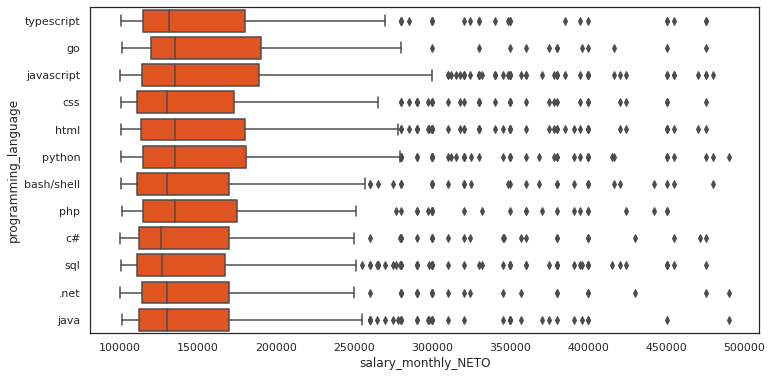

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_max_salaries_12populars_woo, x='salary_monthly_NETO', y='programming_language',
                color='orangered', order = my_order)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
#df_max_salaries_12populars_woo.groupby(by='programming_language').describe().round(2)
df_max_salaries_12populars_woo.groupby("programming_language")['salary_monthly_NETO'].describe().sort_values('mean', ascending=False).round(2)


,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
go,154.0,169464.74,77676.02,101410.0,120000.00,135000.0,190000.0,475000.0
javascript,686.0,166362.66,77558.50,100171.0,114000.00,135000.0,188984.5,480000.0
html,428.0,165606.93,79199.04,100500.0,113750.00,135000.0,180000.0,475000.0
python,498.0,164107.40,74374.71,100600.0,115000.00,135000.0,180750.0,490000.0
php,233.0,164039.71,75918.02,101000.0,115000.00,135000.0,175000.0,450000.0
typescript,246.0,163231.08,76173.67,100600.0,115000.00,131500.0,180000.0,475000.0
c#,178.0,162756.18,82315.89,100171.0,112000.00,126150.0,170000.0,475000.0
css,287.0,161331.04,77137.22,100500.0,110985.50,130000.0,173000.0,475000.0
.net,209.0,157786.50,73719.17,100171.0,114000.00,130000.0,170000.0,490000.0


**Conclusiones:**

*   Podemos observar como los lenguajes populares asociados a los mejores salarios, tomando en cuenta la media, son:
    1. go
    2. Javascript
    3. html

In [ ]:
#obtenemos las longitudes de los diferentes df
lon_inicial_woo = len(df_lang_woo)
lon_most_pop_woo = len(df_most_pop_lenguals_total_woo)
lon_max_sal_woo = len(df_max_salaries_woo)
lon_max_sal_most_pop_woo = len(df_max_salaries_12populars_woo)

In [ ]:
P_A_I_B_wo = round(lon_max_sal_most_pop_woo/lon_inicial_woo,2) #lon_max_salaries
P_B_wo = round(lon_most_pop_woo/lon_inicial_woo,2)
P_A_wo = round(lon_max_sal_woo/lon_inicial_woo,2)
print(f"Prob. cobrar mas de 100000: {P_A_wo*100}%")
print(f"Prob. de conocer al menos un lenguaje de los 12 mas populares : {P_B_wo*100}%")
print("Prob. de lenguajes mas populares con respecto al total que tienen mayor salario: ", P_A_I_B_wo*100,"%")

Prob. cobrar mas de 100000: 32.0%
Prob. de conocer al menos un lenguaje de los 12 mas populares : 86.0%
Prob. de lenguajes mas populares con respecto al total que tienen mayor salario:  27.0 %


**Probabilidades con datos sin Outliers**

**A** = salary_monthly_NETO > 100000

**B** = programming_language in most_popular_lenguages

$$P(A)= 32\%$$
$$P(B)= 86\%$$
$$P(A \cap B)= 27\%$$

A simple vista sabiendo que dos conjuntos son independientes si:


$$P(A)* P(B) = P(A \cap B)$$

Podemos decir que A y B tienen cierta independiencia


In [ ]:
print(f"P(A) = {P_A_wo} | P(b) = {P_B_wo} -> P(A)*P(B) = P(A ∩ B) = {round(P_A_wo*P_B_wo*100,2)}% ")

P(A) = 0.32 | P(b) = 0.86 -> P(A)*P(B) = P(A ∩ B) = 27.52% 


## **3.** Conclusiones

Tomaremos las probabilidades sin outliers, aunque los datos con outliers no son sumamente difetentes.

**A** = salary_monthly_NETO > 100000

**B** = programming_language in most_popular_lenguages

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Probabilidad de cobrar mas por conocer al menos alguno de los lenguages mas populares

In [ ]:
print(f"P(A ∩ B) (Probabilidad de cobrar un salario mayor a 100000$ y programar en los lenguajes mas populares) = {P_A_I_B_wo*100}")
print(f"P(B) (Prbabilidad de conocer al menos un lenguaje mas popular) = {P_B_wo*100}")
print(f"P(A) (Prbabilidad de conocer al menos un lenguaje mas popular) = {P_A_wo*100}")
print(f"P(A|B) (Probabilidad de tener un salario mayor a 100000$ dado que se sabe un lenguaje mas popular) {round(P_A_I_B_wo/P_B_wo,2)*100}%")

P(A ∩ B) (Probabilidad de cobrar un salario mayor a 100000$ y programar en los lenguajes mas populares) = 27.0
P(B) (Prbabilidad de conocer al menos un lenguaje mas popular) = 86.0
P(A) (Prbabilidad de conocer al menos un lenguaje mas popular) = 32.0
P(A|B) (Probabilidad de tener un salario mayor a 100000$ dado que se sabe un lenguaje mas popular) 31.0%


**Conclusiones:**

*  Verificamos que **A** y **B** son casi independientes debido a que $P(A|B) = 31\% $ $ ≈ P(A) = 32\% $
*   Conocer al menos un lenguaje mas popular disminuye un 1% las probabilidades de tener un salario mayor a 100000.
*   Como no se puede afirmar que los lenguajes mas populares estan relacionados a tener un mayor salario, para hacer el analisis de los lenguajes de programacion que tienen mejores sueldos, seria necesario no encararlo desde los lenguajes mas populares.
*  Para hacer este nuevo analisis se puede encararlo observando la cantidad de lenguajes conocidos de un programador, framework utilizado o puesto, en lugar de unicamente un lenguaje de programacion.

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [ ]:
categorical_vars = ["work_province","profile_gender"]
numerical_vars = ["salary_monthly_BRUTO","salary_monthly_NETO","profile_years_experience","profile_age"]

Text(0, 0.5, 'Count')

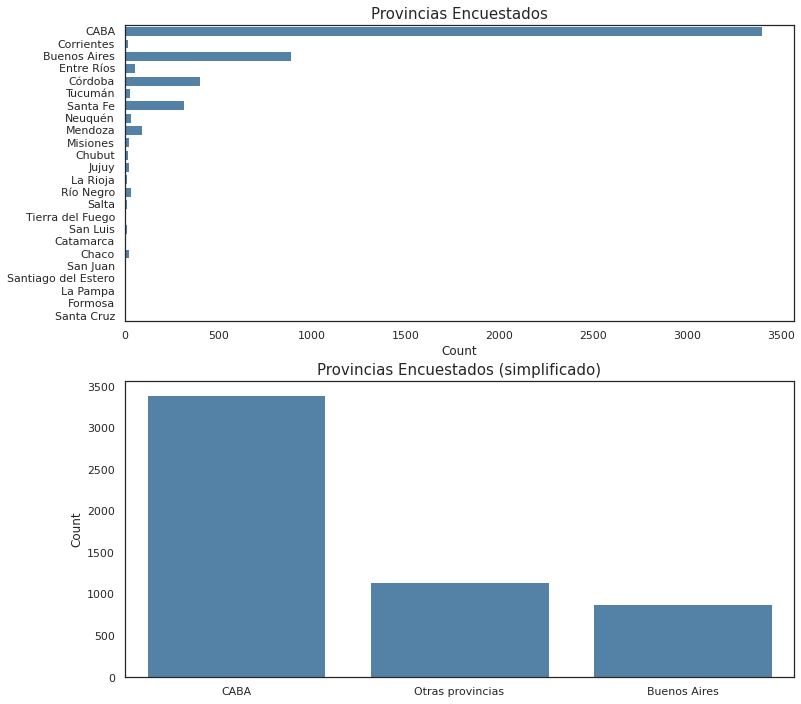

In [ ]:
def cured_work_province(province):
    if(province == "Ciudad Autónoma de Buenos Aires"):
        return province.replace("Ciudad Autónoma de Buenos Aires","CABA")
    elif(province == "GBA" or province == "Provincia de Buenos Aires"):
         return province.replace("GBA","Buenos Aires").replace("Provincia de Buenos Aires","Buenos Aires")
    else:
        return province
    
def reduced_work_province(province):
  if(province == "CABA" or province == "Buenos Aires"):
    return province
  else:
    return "Otras provincias"

    
fig, cols = plt.subplots(nrows=2, figsize=(12, 12))

g0 = seaborn.countplot(y = df_woo.work_province.apply(cured_work_province),color="steelblue", ax = cols[0])
g0.set_title("Provincias Encuestados")
g0.set_ylabel("", fontsize = 1)
g0.set_xlabel("Count", fontsize = 12)
#g0.set_xticklabels(list(OrderedDict.fromkeys(df.work_province.apply(cured_work_province).tolist())), rotation=45,fontsize=10)

g1 = seaborn.countplot(x = df_woo.work_province.apply(cured_work_province).apply(reduced_work_province),color="steelblue",\
                       ax = cols[1])
g1.set_title("Provincias Encuestados (simplificado)")
g1.set_xlabel("", fontsize = 1)
g1.set_ylabel("Count", fontsize = 12)

Text(0, 0.5, 'Count')

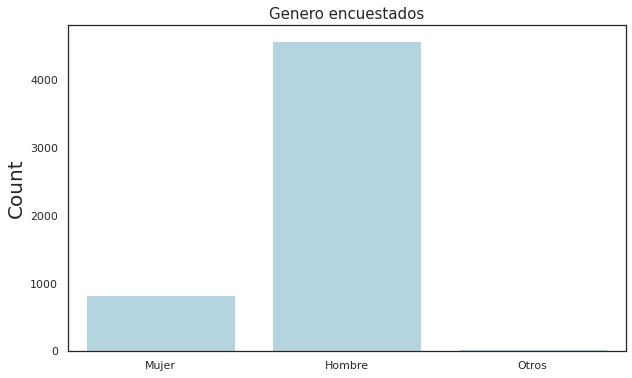

In [ ]:
fig = plt.figure(figsize=(10,6))
g2 = seaborn.countplot(x = df_woo.profile_gender, color="lightblue")
g2.set_title("Genero encuestados")
g2.set_xlabel("", fontsize = 1)
g2.set_ylabel("Count", fontsize = 20)

work_province   Buenos Aires  CABA  Otras provincias
profile_gender                                      
Hombre                   793  2772              1015
Mujer                     89   609               127
Otros                      3    20                 5


Text(111.5, 0.5, 'Genero')

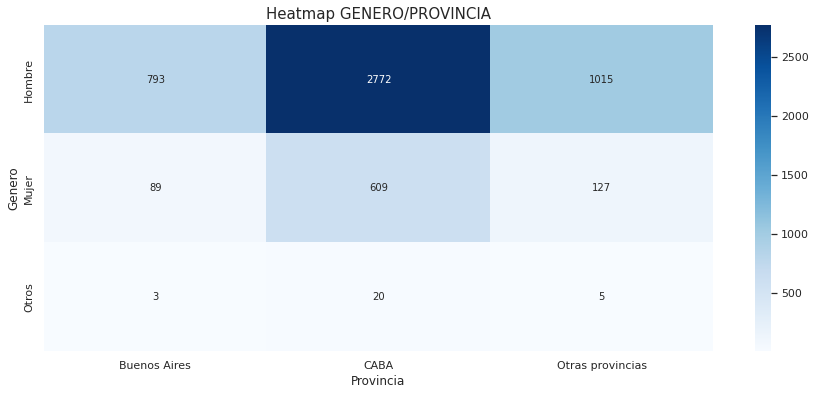

In [ ]:
fig = plt.figure(figsize=(15,6))
exp = pd.crosstab(df_woo.profile_gender,
                  df_woo.work_province.apply(cured_work_province).apply(reduced_work_province))
print(exp)
g3 = seaborn.heatmap(exp, annot=True, fmt='g', cmap="Blues")
g3.set_title("Heatmap GENERO/PROVINCIA")
g3.set_xlabel("Provincia", fontsize = 12)
g3.set_ylabel("Genero", fontsize = 12)

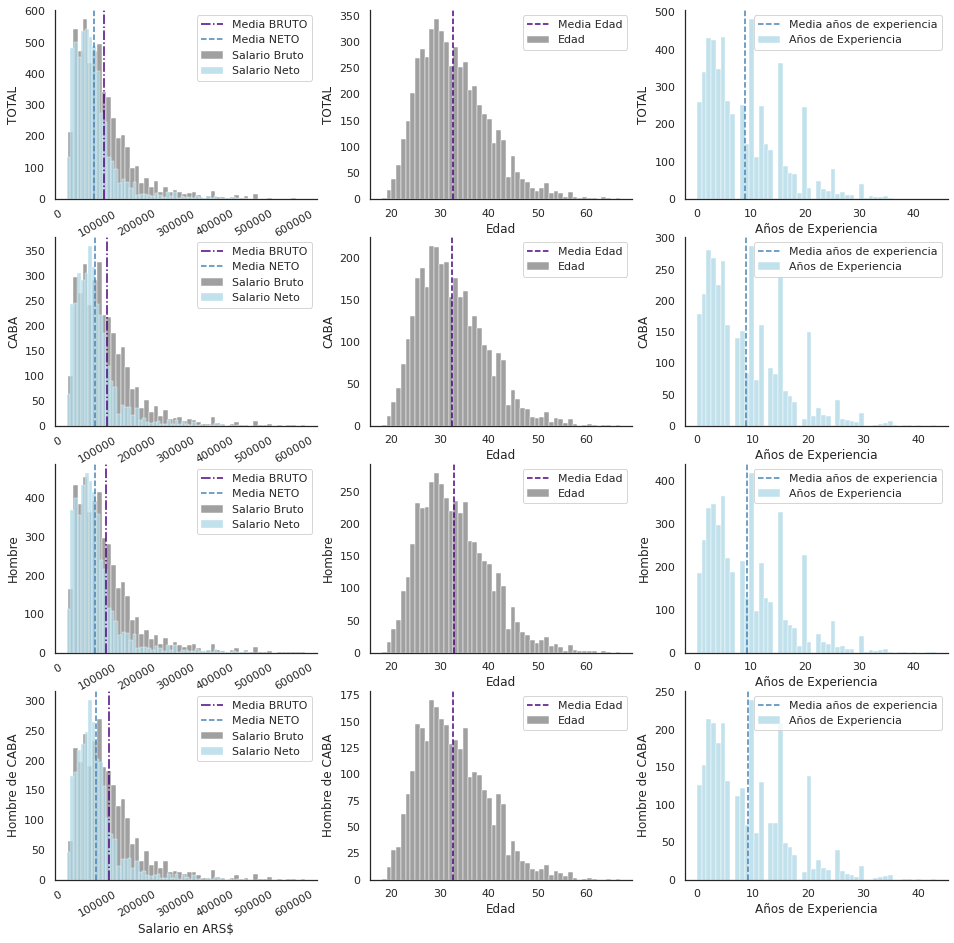

In [ ]:
salary_col_NETO = "salary_monthly_NETO" 
salary_col_BRUTO = "salary_monthly_BRUTO" 

filtered_df_province = df_woo[(df_woo["work_province"] == "Ciudad Autónoma de Buenos Aires")]
filtered_df_gender = df_woo[df_woo["profile_gender"] == "Hombre"]
filtered_df_man_CABA = df_woo[(df_woo["profile_gender"] == "Hombre") & (df_woo["work_province"] == "Ciudad Autónoma de Buenos Aires")]


cond_plot = [df_woo,filtered_df_province, filtered_df_gender,filtered_df_man_CABA]
ylabel = ["TOTAL","CABA","Hombre","Hombre de CABA"]

fig, axes = plt.subplots(nrows=4,ncols=3, figsize=(16, 16))

for col in range(3):
  for row in range(4):
    if col == 0:
      seaborn.histplot(cond_plot[row][salary_col_BRUTO], bins=50, ax=axes[row][col], color='gray', label="Salario Bruto")
      axes[row][col].axvline(cond_plot[row][salary_col_BRUTO].mean(), color='indigo', linestyle='-.', label='Media BRUTO')
      seaborn.histplot(cond_plot[row][salary_col_NETO], bins=50, ax=axes[row][col], color='lightblue', label="Salario Neto")\
      .set_ylabel(ylabel[row],fontsize = 12)
      axes[row][col].axvline(cond_plot[row][salary_col_NETO].mean(), color='steelblue', linestyle='--', label='Media NETO')
      axes[row][col].legend()
      axes[row][col].set_xlabel("Salario en ARS$")
      axes[row][col].tick_params(axis='x', labelrotation=30)
    elif col == 1:
      seaborn.histplot(cond_plot[row]["profile_age"], bins=50, ax=axes[row][col], color='gray', label="Edad")\
      .set_ylabel(ylabel[row],fontsize = 12)
      axes[row][col].axvline(cond_plot[row]["profile_age"].mean(), color='indigo', linestyle='--', label='Media Edad')
      axes[row][col].legend()
      axes[row][col].set_xlabel("Edad")
    elif col == 2:
      seaborn.histplot(cond_plot[row]["profile_years_experience"], bins=50, ax=axes[row][col], color='lightblue', label="Años de Experiencia")\
      .set_ylabel(ylabel[row],fontsize = 12)
      axes[row][col].axvline(cond_plot[row]["profile_years_experience"].mean(), color='steelblue', linestyle='--', label='Media años de experiencia')
      axes[row][col].legend()
      axes[row][col].set_xlabel("Años de Experiencia")
    
seaborn.despine()

In [ ]:
for i in range(4):
  print(f"Salario NETO: \n {ylabel[i]} \n {cond_plot[i].salary_monthly_NETO.describe()} \n")
  print(f"Salario BRUTO: \n {ylabel[i]} \n {cond_plot[i].salary_monthly_BRUTO.describe()} \n")
  print(f"Edad: \n {ylabel[i]} \n {cond_plot[i].profile_age.describe()} \n")
  print(f"Años de experiencia: \n {ylabel[i]} \n {cond_plot[i].profile_years_experience.describe()} \n")

Salario NETO: 
 TOTAL 
 count      5433.000000
mean      91988.030191
std       59127.833639
min       22500.000000
25%       55000.000000
50%       80000.000000
75%      107000.000000
max      490000.000000
Name: salary_monthly_NETO, dtype: float64 

Salario BRUTO: 
 TOTAL 
 count      5433.000000
mean     118451.868253
std       79059.525631
min       27000.000000
25%       65846.000000
50%       99800.000000
75%      144830.000000
max      630000.000000
Name: salary_monthly_BRUTO, dtype: float64 

Edad: 
 TOTAL 
 count    5433.000000
mean       32.635929
std         7.225001
min        18.000000
25%        27.000000
50%        32.000000
75%        37.000000
max        67.000000
Name: profile_age, dtype: float64 

Años de experiencia: 
 TOTAL 
 count    5433.000000
mean        8.933425
std         7.019028
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        44.000000
Name: profile_years_experience, dtype: float64 

Salario NETO: 
 CABA 
 cou

In [ ]:
for i in range(3):
  print(f"Error relativo porcentual de las medidas respecto al total: \n Subpoblacion: {ylabel[i+1]} \n Salario NETO \n\
   {abs(cond_plot[0].salary_monthly_NETO.describe()-cond_plot[i+1].salary_monthly_NETO.describe())*100/cond_plot[0].salary_monthly_NETO.describe()} \n")
  print(f"\n Salario BRUTO \n\
   {abs(cond_plot[0].salary_monthly_BRUTO.describe()-cond_plot[i+1].salary_monthly_BRUTO.describe())*100/cond_plot[0].salary_monthly_BRUTO.describe()} \n")
  print(f"\n Edad: \n\
   {abs(cond_plot[0].profile_age.describe()-cond_plot[i+1].profile_age.describe())*100/cond_plot[0].profile_age.describe()} \n")
  print(f"Años de experiencia: \n\
   {abs(cond_plot[0].profile_years_experience.describe()-cond_plot[i+1].profile_years_experience.describe())*100/cond_plot[0].profile_years_experience.describe()} \n")

Error relativo porcentual de las medidas respecto al total: 
 Subpoblacion: CABA 
 Salario NETO 
   count    37.401068
mean      2.493537
std       6.660556
min       0.000000
25%       7.272727
50%       4.343750
75%       2.803738
max       2.040816
Name: salary_monthly_NETO, dtype: float64 


 Salario BRUTO 
   count    37.401068
mean      4.715608
std       1.318918
min       0.000000
25%       6.308660
50%       5.210421
75%       3.569702
max       0.000000
Name: salary_monthly_BRUTO, dtype: float64 


 Edad: 
   count    37.401068
mean      0.762912
std       0.457257
min       0.000000
25%       0.000000
50%       3.125000
75%       0.000000
max       0.000000
Name: profile_age, dtype: float64 

Años de experiencia: 
   count    37.401068
mean      1.370126
std       0.637405
min            NaN
25%       0.000000
50%       0.000000
75%       0.000000
max       2.272727
Name: profile_years_experience, dtype: float64 

Error relativo porcentual de las medidas respecto al total: 


### **Conclusiones**

- La mayoria de personas que respondieron la encuesta son Hombres.

- La mayor participacion se nucleo en las personas de CABA.

- Se observa que las medidas estadisticas de las subpoblaciones respecto al espacio muestral no difieren mas de un 10% en el caso de la media y la desviacion estandar y mas de un 35% en el caso de los cuartiles.

- Tanto la subpoblacion Hombres, como la Subpoblacion CABA son lo suficientemente representativas para las cuatros variables numericas.

- La subpoblacion Hombres de CABA no es tan representativa respecto a las variables de salario mensual BRUTO y NETO, pero si respecto a la edad y a los años de experiencia.

- Se puede establecer la hipotesis de que es mucho menor la proporcion de mujeres que de hombres que sean programadores en Argentina o que es mucha mas la gente de Buenos Aires que programa respecto a las demas provincias, aunque tambien pueden ser sesgos propios de la encuesta.


## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



In [ ]:
#obtenemos los outliers
min_thresold_neto, max_thresold_neto = df.salary_monthly_NETO.quantile([0.1,0.9])
print(f"Outliers neto: ({min_thresold_neto} , {max_thresold_neto})")
min_thresold_bruto, max_thresold_bruto = df.salary_monthly_BRUTO.quantile([0.1,0.9])
print(f"Outliers bruto: ({min_thresold_bruto} , {max_thresold_bruto})")

Outliers neto: (35000.0 , 150000.0)
Outliers bruto: (40000.0 , 220000.0)


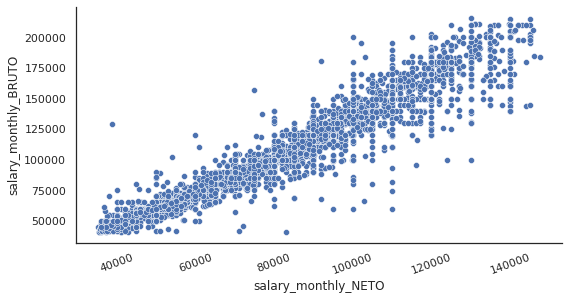

In [ ]:
max_age = 75
df_limpio=df[(df.profile_age < max_age) & (df.salary_monthly_NETO > min_thresold_neto) & (df.salary_monthly_NETO < max_thresold_neto) &
             (df.salary_monthly_BRUTO > min_thresold_bruto) & (df.salary_monthly_BRUTO < max_thresold_bruto)]
seaborn.pairplot(data=df_limpio, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4);
plt.xticks(rotation=20);

In [ ]:
df_br_ne = pd.DataFrame(df_limpio,columns=['salary_monthly_BRUTO','salary_monthly_NETO'])#creo df con solo esas dos columnas
df_br_ne[:3]
print(f"Media Salario Bruto: {round(df_limpio['salary_monthly_BRUTO'].mean(),2)}")
print(f"Media Salario Neto: {round(df_limpio['salary_monthly_NETO'].mean(),2)}")
#Correlacion
corr_df = df_br_ne.corr()
print("Matriz de correlacion")
print(corr_df, "\n")
print('Coef de correlación entra ambas variables: ', round(corr_df.iloc[0]['salary_monthly_NETO'],2) ,'\n')
#Covarianza
cov_df = df_br_ne.cov()
#print("Matriz de covarianza")
#print(cov_df, "\n")
if round(cov_df.iloc[0]['salary_monthly_NETO'],2) >= 0:
  print('Coef de covarianza entra ambas variables: Positivo \n')
else:
  print('Coef de covarianza entra ambas variables: Negativo \n')
#cov mayor a cero correlacion positiva

Media Salario Bruto: 101644.31
Media Salario Neto: 79247.87
Matriz de correlacion
                      salary_monthly_BRUTO  salary_monthly_NETO
salary_monthly_BRUTO              1.000000             0.959481
salary_monthly_NETO               0.959481             1.000000 

Coef de correlación entra ambas variables:  0.96 

Coef de covarianza entra ambas variables: Positivo 



**Correlacion:**

Coef de correlación entra ambas variables:  0.96

*   Si r = 1, existe una correlación positiva perfecta. Por lo tanto el índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.
*   Existe una correlacion positiva y una asociación muy alta.

**Covarianza:**

Covarianza entra ambas variables:  Positivo

*   Existe una correlacion positiva y una asociación muy alta.

**Conclusiones:**

*   Son variables dependientes, se podria quitar el salario bruto y quedarnos unicamente con el neto por su nivel de correlacion

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
salary_column = 'salary_monthly_NETO'
level_study_column = 'profile_studies_level'

### **Analisis 1**
Tomamos dos subpoblaciones en torno al nivel de estudio, la subpoblacion no universitaria y la universitaria.

*   **Subpoblacion 1**: `'profile_studies_level'` == `'Primario', 'Secundario', 'Terciario'`
*   **Subpoblacion 2**: `'profile_studies_level'` == `'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado'`

In [ ]:
sub_pob_1 = ['Primario', 'Secundario', 'Terciario']
sub_pob_2 = ['Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']

In [ ]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado'] #lista de los nombres de categorías ordenadas
df_sub_p_1=df_woo[df_woo['profile_studies_level'].isin(sub_pob_1)]
print(f"Longitud de la sub poblacion 1: {len(df_sub_p_1)}")
df_sub_p_2=df_woo[df_woo['profile_studies_level'].isin(sub_pob_2)]
print(f"Longitud de la sub poblacion 2: {len(df_sub_p_2)}")

Longitud de la sub poblacion 1: 1417
Longitud de la sub poblacion 2: 4016


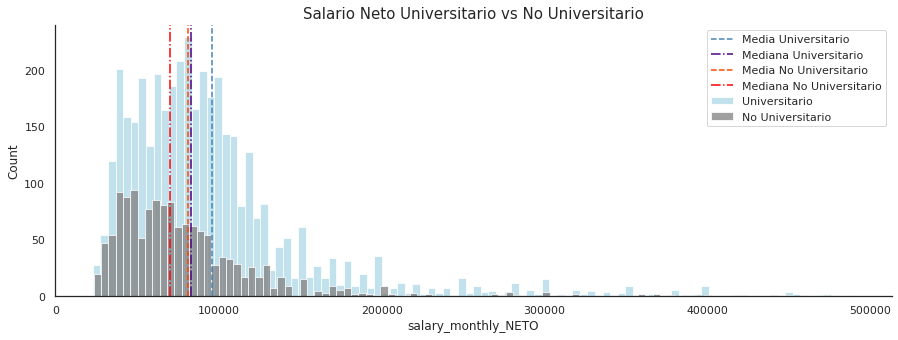

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(15, 5))
plt.title(f"Salario Neto Universitario vs No Universitario")
seaborn.histplot(df_sub_p_2[salary_column], bins=100, ax=axes, color='lightblue',label='Universitario')
axes.axvline(df_sub_p_2[salary_column].mean(), color='steelblue',
            linestyle='--', label='Media Universitario')
axes.axvline(df_sub_p_2[salary_column].median(), color='indigo',
            linestyle='-.', label='Mediana Universitario')
axes.legend()
seaborn.despine()
#plt.title(f"Salario Neto No universitario")
seaborn.histplot(df_sub_p_1[salary_column], bins=100, ax=axes, color='gray',label='No Universitario')
axes.axvline(df_sub_p_1[salary_column].mean(), color='orangered',
            linestyle='--', label='Media No Universitario')
axes.axvline(df_sub_p_1[salary_column].median(), color='red',
            linestyle='-.', label='Mediana No Universitario')
axes.legend()
seaborn.despine()


### **Subpoblacion 1**: `'profile_studies_level'` == `'Primario', 'Secundario', 'Terciario'`

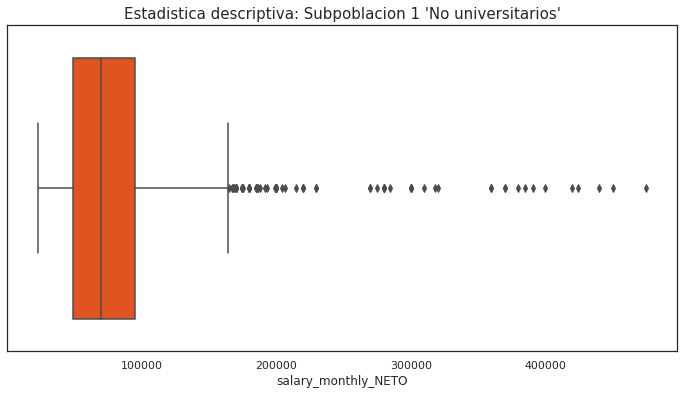

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_sub_p_1, x=salary_column,
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.title(f"Estadistica descriptiva: Subpoblacion 1 'No universitarios'");
#agregar medias

In [ ]:
df_sub_p_1[salary_column].describe()

count      1417.000000
mean      81107.985095
std       52530.723884
min       23003.000000
25%       49000.000000
50%       70000.000000
75%       95000.000000
max      475000.000000
Name: salary_monthly_NETO, dtype: float64

###  **Subpoblacion 2**: `'profile_studies_level'` == `'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado'`


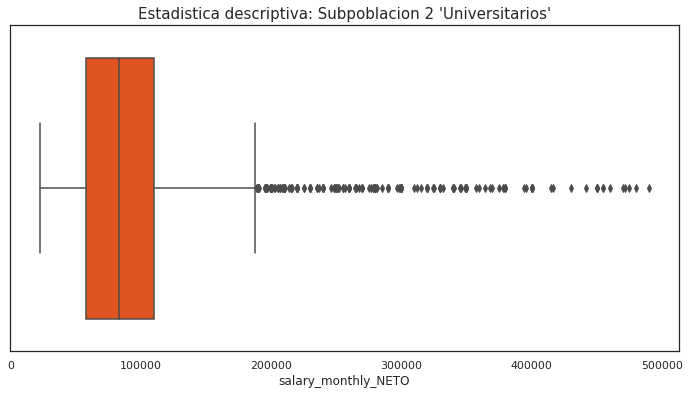

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_sub_p_2, x=salary_column,
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.title(f"Estadistica descriptiva: Subpoblacion 2 'Universitarios'");

In [ ]:
df_sub_p_2[salary_column].describe()

count      4016.000000
mean      95826.930565
std       60829.626236
min       22500.000000
25%       58000.000000
50%       83000.000000
75%      110000.000000
max      490000.000000
Name: salary_monthly_NETO, dtype: float64

###**Conclusiones**

Con ambas subpoblaciones se puede deducir que el salario neto de un programador depende del nivel de estudio.

*   Se observa la diferencia de salario entre una persona con estudios universitarios y otra que no.
*   Para la poblacion de universitarios las medias estadisticas crecen con respecto a los no universitarios.
*   La cantidad de no universitarios es menor, por lo que se puede deducir que entrar al mercado laboral de programador es mas sencillo para una persona con estudios universitarios.


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


*   **Variables numericas:** work_people_in_charge_of, salary_monthly_NETO
*   **Variable categorica:** work_role

In [ ]:
df['work_role_bis'] = df['work_role']
df.loc[(df['work_role_bis'] != 'Developer') & 
       (df['work_role_bis'] != 'SysAdmin / DevOps / SRE') &
       (df['work_role_bis'] != 'Business Analyst') &
       (df['work_role_bis'] != 'Technical Leader') &
       (df['work_role_bis'] != 'QA / Tester')&
       (df['work_role_bis'] != 'Manager / Director')&
       (df['work_role_bis'] != 'HelpDesk') &
       (df['work_role_bis'] != 'Project Manager')&
       (df['work_role_bis'] != 'Architect') &
       (df['work_role_bis'] != 'Data Scientist / Data Engineer')&
       (df['work_role_bis'] != 'Consultant') &
        (df['work_role_bis'] != 'Networking') &
        (df['work_role_bis'] != 'BI Analyst / Data Analyst')&
        (df['work_role_bis'] != 'UX') &
        (df['work_role_bis'] != 'Infosec'),
        'work_role_bis']= 'Otras funciones'

In [ ]:
#quitamos outliers de personas a cargo y salario neto
min_pc, max_pc = df.work_people_in_charge_of.quantile([0,0.996])
min_sal, max_sal = df.salary_monthly_NETO.quantile([0.05,0.99])
df_clean_wo_pc_sn = df[(df.salary_monthly_NETO<max_sal)&(df.salary_monthly_NETO>min_sal)&
                        (df.work_people_in_charge_of<max_pc)]

max_pc

50.0

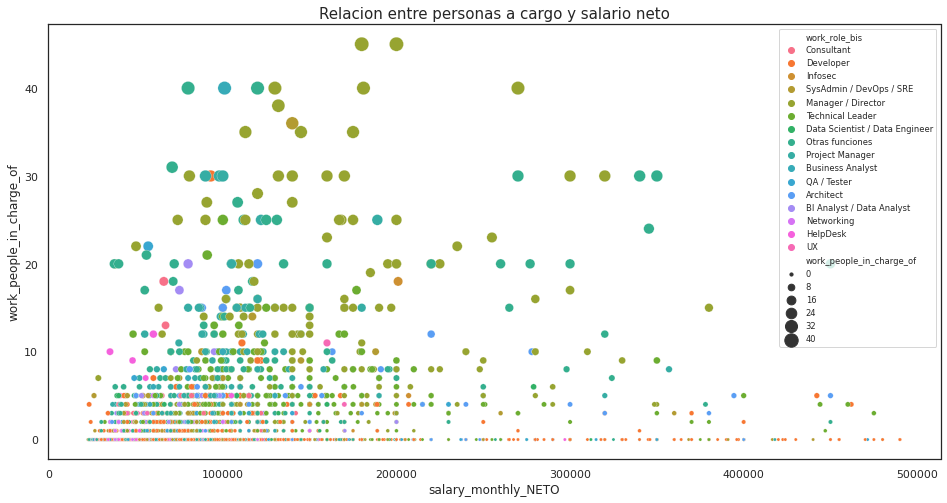

In [ ]:
plt.figure(figsize=(16,8));
cmap = seaborn.cubehelix_palette(rot=-.2, as_cmap=True)
seaborn.scatterplot(data=df_clean_wo_pc_sn,y='work_people_in_charge_of',x='salary_monthly_NETO',hue='work_role_bis',\
                    size='work_people_in_charge_of', sizes=(10,200));
plt.title('Relacion entre personas a cargo y salario neto');
plt.legend(fontsize="small")

In [ ]:
df_woo_corr = pd.DataFrame(df_woo,columns=['work_people_in_charge_of','salary_monthly_NETO'])#creo df con solo esas dos columnas
corr_df_NPC = df_woo_corr.corr()
print(f"Correlacion entre personas a cargo y salario: {round(corr_df_NPC.iloc[0]['salary_monthly_NETO'],3)}")
cov_df_NPC = df_woo_corr.cov()
#print("Matriz de covarianza")
#print(cov_df, "\n")
if round(cov_df_NPC.iloc[0]['salary_monthly_NETO'],3) >= 0:
  print('Coef de covarianza entra ambas variables: Positivo \n')
else:
  print('Coef de covarianza entra ambas variables: Negativo \n')

Correlacion entre personas a cargo y salario: 0.203
Coef de covarianza entra ambas variables: Positivo 



###**Conclusiones**

*   Podemos concluir que tener personas a cargo correlaciona ligeramente con el salario NETO percibido, es decir que ambas variables tienen baja relacion lineal.
*   Dada la covarianza positiva, si la cantidad de personas a cargo aumenta se espera que tambien lo haga el salario NETO aunque no de la misma manera.
*   Los puestos con mayor personas a cargo son los **Manager/Director**, **Otras funciones** (puestos administrativos jerarquicos) y en menor medida los **Project Manager**. Otros puestos que aparecen una unica vez con una cantidad importante de personas a cargo son los de **Developer**, **Buissnes Analyst** y **SysAdmin/DevOps/SRE**


